In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('limited_engagement_2023_h1_plus.csv')

In [3]:
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12937 entries, 0 to 12936
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           12937 non-null  int64  
 1   Title                12937 non-null  object 
 2   Available Globally?  12937 non-null  object 
 3   Release Date         4218 non-null   object 
 4   Hours Viewed         12937 non-null  int64  
 5   Number of Ratings    9963 non-null   float64
 6   Rating               9963 non-null   float64
 7   Genre                11089 non-null  object 
 8   Key Words            8951 non-null   object 
 9   Description          7512 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1010.8+ KB


Index(['Unnamed: 0', 'Title', 'Available Globally?', 'Release Date',
       'Hours Viewed', 'Number of Ratings', 'Rating', 'Genre', 'Key Words',
       'Description'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                0
Title                     0
Available Globally?       0
Release Date           8719
Hours Viewed              0
Number of Ratings      2974
Rating                 2974
Genre                  1848
Key Words              3986
Description            5425
dtype: int64

In [5]:
print(df['Title'].duplicated().sum())

85


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12937.0,8.709492e+03,5.253385e+03,0.0,4139.0,8466.0,13226.0,18320.0
Hours Viewed,12937.0,5.536168e+06,1.916705e+07,100000.0,200000.0,900000.0,4000000.0,812100000.0
Number of Ratings,9963.0,4.505317e+04,1.457066e+05,5.0,330.0,2652.0,18984.0,2829797.0
Rating,9963.0,6.556539e+00,1.230248e+00,1.4,5.8,6.6,7.4,10.0


In [7]:
df['Available Globally?'].value_counts()

Available Globally?
No     8967
Yes    3970
Name: count, dtype: int64

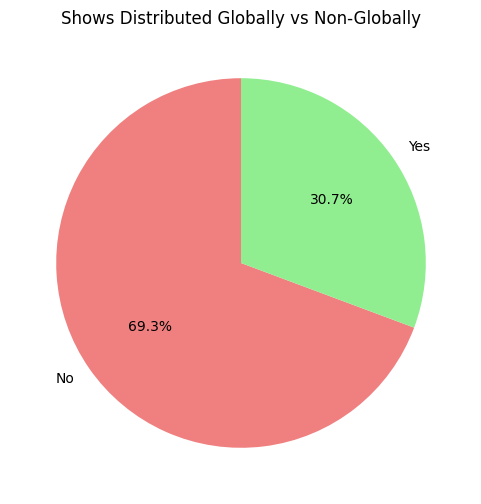

In [8]:
value_count = df['Available Globally?'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(value_count,labels=value_count.index,autopct='%1.1f%%',startangle=90, colors=['lightcoral','lightgreen'])
plt.title('Shows Distributed Globally vs Non-Globally')
plt.show()

In [9]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Number of Ratings'] = np.int64(df['Number of Ratings'])
df['Release Year'] = df['Release Date'].dt.year.fillna(0).astype('int64')
df['Release Month'] = df['Release Date'].dt.month.fillna(0).astype('int64')
df['Release Day'] = df['Release Date'].dt.day_name()

/home/malhar/User_Drive/TY_Study/dsci_netflix_viewership_analysis_python/venv/lib/python3.13/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [10]:
df['Release Day'].fillna('Unknown', inplace = True)

/tmp/ipykernel_77474/2657341095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Release Day'].fillna('Unknown', inplace = True)


In [11]:
df['Number of Ratings'].max()


np.int64(2829797)

In [12]:
df['Number of Ratings'].min()

np.int64(-9223372036854775808)

In [13]:
df[df['Number of Ratings'] <= 0]['Number of Ratings'].count()

np.int64(2974)

In [14]:
df[df['Number of Ratings'] <= 0]['Number of Ratings'].nunique()

1

In [15]:
df["Available Globally"] = df["Available Globally?"]
df.drop(columns=("Available Globally?"), axis = 1, inplace = True)

In [16]:
df.loc[df['Number of Ratings'] < 0, 'Number of Ratings'] = 0  # Set negative values to 0
median_value = df['Number of Ratings'].median()  # Calculate median
df['Number of Ratings'] = df['Number of Ratings'].replace(0, median_value)  # Replace 0 with median

median_value = df['Rating'].median()  # Calculate median
df['Rating'].fillna(df['Rating'].median(), inplace=True)

df_with_ratings = df.loc[df['Number of Ratings'] > 0]
df_with_ratings.sample(3)
df_with_ratings.shape
df_with_ratings.Rating.isnull().sum()
df_with_ratings.Rating.isnull().sum()
df_with_ratings.Genre.unique()

/tmp/ipykernel_77474/1243896740.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)


array(["['Biography', 'Drama', 'History']",
       "['Comedy', 'Drama', 'Romance']",
       "['Drama', 'History', 'Romance']", "['Comedy', 'Romance']",
       "['Action', 'Crime', 'Drama']", nan, "['Documentary', 'Short']",
       "['Crime', 'Drama', 'Mystery']", "['Action', 'Thriller']",
       "['Short']", "['Action', 'Adventure', 'Drama']",
       "['Horror', 'Mystery', 'Sci-Fi']",
       "['Family', 'History', 'Sport']", "['Romance']",
       "['Drama', 'Horror', 'Thriller']", "['Action', 'Comedy', 'Crime']",
       "['Comedy']", "['Adventure', 'Family', 'Fantasy']",
       "['Animation', 'Action', 'Adventure']",
       "['Adventure', 'Comedy', 'Family']",
       "['Short', 'Drama', 'Western']", "['Comedy', 'Crime', 'Drama']",
       "['Animation', 'Short']", "['Drama', 'Fantasy', 'Horror']",
       "['Crime', 'Drama']", "['Animation', 'Short', 'Adventure']",
       "['Sport']", "['Adventure', 'Comedy', 'Drama']",
       "['Crime', 'Horror', 'Mystery']", "['Documentary']",
       "

In [17]:
df_with_ratings.Genre.isnull().sum()
df_with_ratings.dropna(subset=['Genre'], inplace = True)
df_with_ratings.isnull().sum()
df_with_ratings['Release Date'].fillna(0, inplace = True)
df_with_ratings.shape

/tmp/ipykernel_77474/103863943.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_ratings['Release Date'].fillna(0, inplace = True)
/tmp/ipykernel_77474/103863943.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_with_ratings['Release Date'].fillna(0, inplace = True)


(11089, 13)

In [18]:
df_with_ratings['Key Words'].fillna('unknown', inplace = True)
df_with_ratings['Description'].fillna('unknown', inplace = True)
df_with_ratings.isnull().sum()

/tmp/ipykernel_77474/1913763075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_ratings['Key Words'].fillna('unknown', inplace = True)
/tmp/ipykernel_77474/1913763075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

Unnamed: 0            0
Title                 0
Release Date          0
Hours Viewed          0
Number of Ratings     0
Rating                0
Genre                 0
Key Words             0
Description           0
Release Year          0
Release Month         0
Release Day           0
Available Globally    0
dtype: int64

In [19]:
all_genres = set(genre.strip("[]").replace("'", "") for genres in df_with_ratings['Genre'].str.split(", ") for genre in genres)
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [20]:
len(all_genres)
for genre in all_genres:
    print(genre,'--->')
    print(df_with_ratings[df_with_ratings['Genre'].apply(lambda x: genre in x)].sort_values(by='Rating', ascending=False).iloc[1][['Title', 'Rating', 'Genre']])
    print('---------------------------------------------')

Fantasy --->
Title     Demon Slayer: Kimetsu no Yaiba: Entertainment ...
Rating                                                  8.9
Genre                    ['Animation', 'Action', 'Fantasy']
Name: 495, dtype: object
---------------------------------------------
Short --->
Title     Big Time Rush: Season 2
Rating                       10.0
Genre         ['Short', 'Comedy']
Name: 3251, dtype: object
---------------------------------------------
Thriller --->
Title     The Marked Heart: Season 2 // Pálpito: Tempora...
Rating                                                  8.7
Genre                       ['Drama', 'Horror', 'Thriller']
Name: 23, dtype: object
---------------------------------------------
Documentary --->
Title     Welcome to Monster High
Rating                        9.6
Genre             ['Documentary']
Name: 9285, dtype: object
---------------------------------------------
Game-Show --->
Title     The Great British Baking Show: Collection 10
Rating                    

In [21]:
df_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11089 entries, 0 to 12936
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          11089 non-null  int64  
 1   Title               11089 non-null  object 
 2   Release Date        11089 non-null  object 
 3   Hours Viewed        11089 non-null  int64  
 4   Number of Ratings   11089 non-null  int64  
 5   Rating              11089 non-null  float64
 6   Genre               11089 non-null  object 
 7   Key Words           11089 non-null  object 
 8   Description         11089 non-null  object 
 9   Release Year        11089 non-null  int64  
 10  Release Month       11089 non-null  int64  
 11  Release Day         11089 non-null  object 
 12  Available Globally  11089 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.2+ MB


In [22]:
df_with_ratings.to_csv("cleaned.csv")